In [1]:
import sys  
sys.path.insert(0, '../py')
from graviti import *

import json
import numpy as np
from skimage.draw import polygon
from skimage import io
from matplotlib import pyplot as plt
import glob
import pandas as pd
import os
from scipy.sparse import coo_matrix
from skimage.measure import label, regionprops#, regionprops_table
import math

import timeit
import multiprocessing
from joblib import Parallel, delayed
from datetime import datetime
from tqdm import tqdm

In [2]:
samples = glob.glob('/media/garner1/hdd2/TCGA_polygons/luad/*.gz')
print('There are '+str(len(samples))+' samples')

There are 300 samples


In [32]:
data = pd.DataFrame()
for filename in glob.glob('/media/garner1/hdd2/TCGA_polygons/luad/TCGA-05-4410-01Z-00-DX1*.gz/*/*.svs/*.pkl'):
    df = pd.read_pickle(filename)
    data = data.append(df, ignore_index = True)
data['area'] = data['area'].astype(float)
print(data.shape)

(9348, 7)


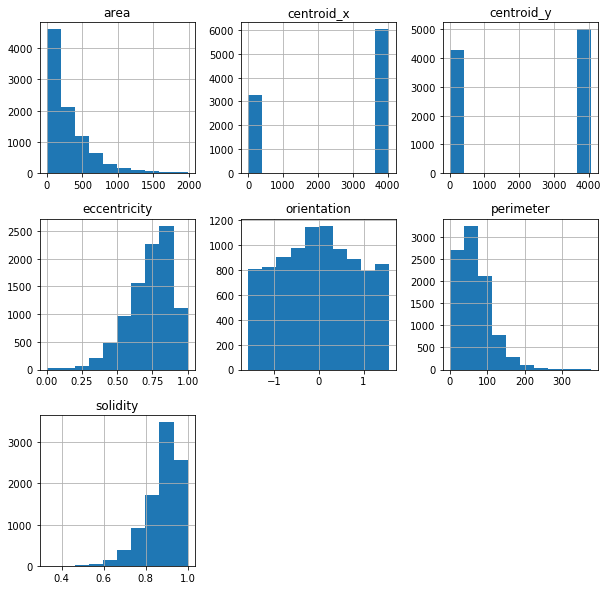

In [33]:
hist = data[data['area']<2000].hist(figsize=(10,10))
plt.show()